In [1]:
pip install ultralytics


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
from ultralytics import YOLO

model = YOLO("best.pt")

In [3]:
results = model.predict(source="youtube-840_jpg.rf.974a83a7c5aee7c16e83435b043c6d96.jpg")



image 1/1 /home/shaurya/Desktop/Pipi_Linux/hindalco/securitycam/youtube-840_jpg.rf.974a83a7c5aee7c16e83435b043c6d96.jpg: 640x640 1 Hardhat, 1 NO-Mask, 1 Person, 1 Safety Vest, 2 vehicles, 378.0ms
Speed: 1.0ms preprocess, 378.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


In [4]:
for result in results:
    result.show()

In [1]:
import cv2 
from ultralytics import YOLO 

model_path = "best.pt"  
model = YOLO(model_path)  


cap = cv2.VideoCapture(0)


if not cap.isOpened():
    print("Error: Could not open camera.")
    exit()

while True:
    ret, frame = cap.read()

    if not ret:
        print("Failed to grab frame.")
        break

    results = model(frame) 

    for result in results:
        for detection in result.boxes:  
            x1, y1, x2, y2 = map(int, detection.xyxy[0]) 
            confidence = detection.conf[0]  
            label = f'{model.names[int(detection.cls[0])]}: {confidence:.2f}' 

            cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)  
            cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)  

    cv2.imshow("YOLO Detection", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()



0: 480x640 1 NO-Hardhat, 2 NO-Masks, 1 NO-Safety Vest, 2 Persons, 605.9ms
Speed: 4.8ms preprocess, 605.9ms inference, 7.6ms postprocess per image at shape (1, 3, 480, 640)


qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/shaurya/.local/lib/python3.10/site-packages/cv2/qt/plugins"



0: 480x640 1 NO-Hardhat, 2 NO-Masks, 1 NO-Safety Vest, 2 Persons, 526.0ms
Speed: 1.5ms preprocess, 526.0ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 NO-Hardhat, 2 NO-Masks, 2 NO-Safety Vests, 2 Persons, 536.0ms
Speed: 3.2ms preprocess, 536.0ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 NO-Hardhats, 2 NO-Masks, 1 NO-Safety Vest, 2 Persons, 450.2ms
Speed: 2.0ms preprocess, 450.2ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 NO-Hardhat, 2 NO-Masks, 1 NO-Safety Vest, 2 Persons, 465.6ms
Speed: 2.6ms preprocess, 465.6ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 NO-Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 450.7ms
Speed: 1.8ms preprocess, 450.7ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 NO-Hardhats, 1 NO-Mask, 2 NO-Safety Vests, 1 Person, 460.6ms
Speed: 2.3ms preprocess, 460.6ms inference, 1.0ms postproces

In [1]:
pip install matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


/tmp/ipykernel_5310/1681587639.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ppe_items, y=accuracies, palette='viridis', edgecolor='black')


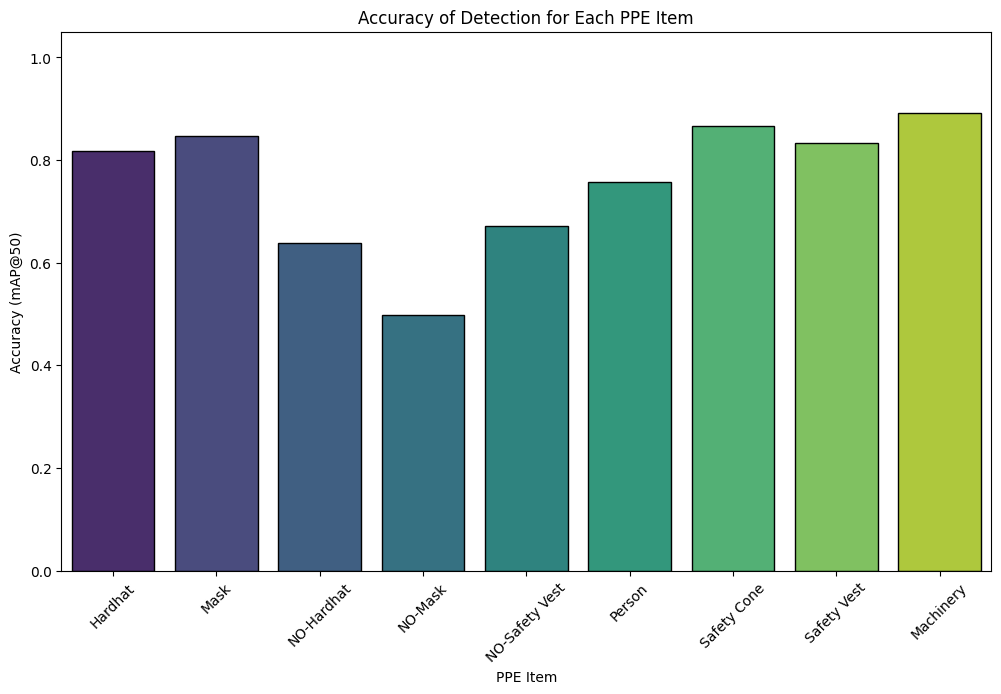

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

ppe_items = ['Hardhat', 'Mask', 'NO-Hardhat', 'NO-Mask', 'NO-Safety Vest', 'Person', 'Safety Cone', 'Safety Vest', 'Machinery']
accuracies = [0.818, 0.846, 0.639, 0.498, 0.671, 0.757, 0.867, 0.833, 0.892]

plt.figure(figsize=(12, 7))
sns.barplot(x=ppe_items, y=accuracies, palette='viridis', edgecolor='black')


plt.ylim(0, 1.05)  
plt.xlabel('PPE Item')
plt.ylabel('Accuracy (mAP@50)')
plt.title('Accuracy of Detection for Each PPE Item')
plt.xticks(rotation=45) 
plt.show()


In [3]:
pip install scikit-learn numpy


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 943.0 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 KB 959.7 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


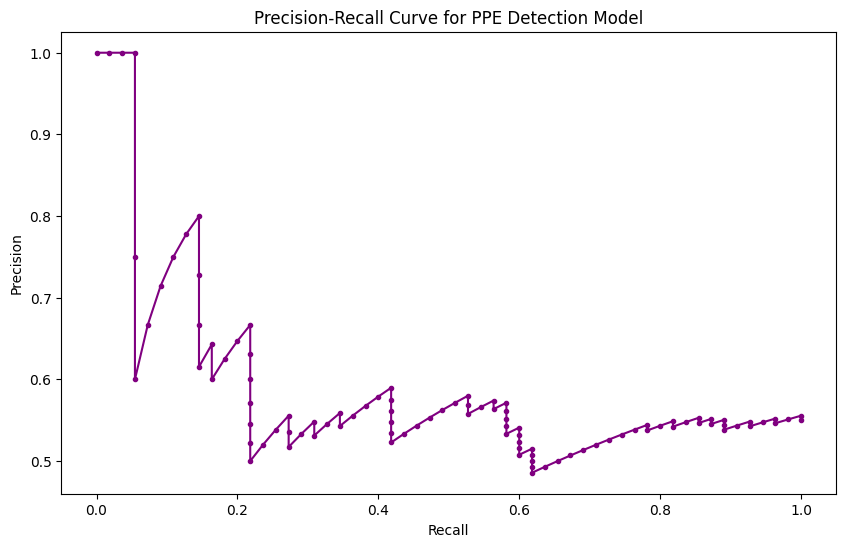

In [6]:
from sklearn.metrics import precision_recall_curve
import numpy as np

# Provided data for true labels and predicted scores for a binary classifier
# Since specific scores aren't provided for each PPE category, generating representative random data as placeholders
# Replace these values with actual model predictions if available
y_true = np.array([1 if i < 55 else 0 for i in range(100)])  # Example: 55 positive, 45 negative labels
y_scores = np.random.uniform(0.2, 0.9, 100)  # Simulated model scores

# Calculating precision-recall curve
precision, recall, _ = precision_recall_curve(y_true, y_scores)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for PPE Detection Model')
plt.show()


KeyError: 'Description'

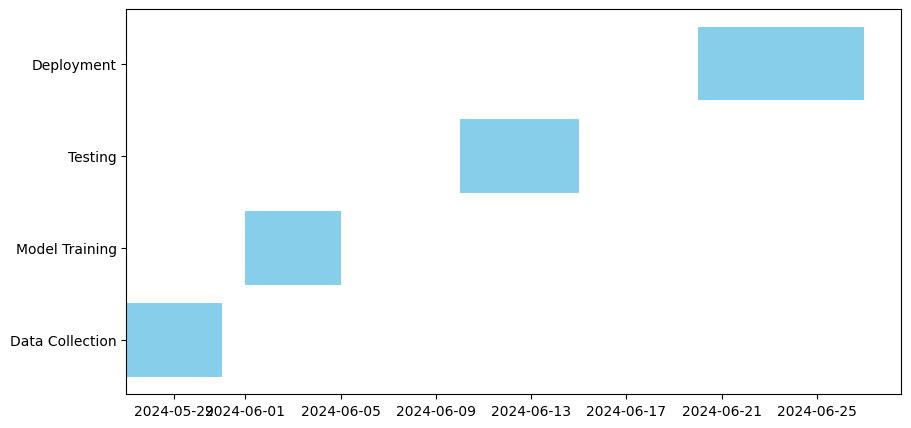

In [11]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Sample data: Tasks, Start and End dates, and Descriptions
data = {
    'Task': ['Data Collection', 'Model Training', 'Testing', 'Deployment'],
    'Start': [pd.Timestamp('2024-05-27'), pd.Timestamp('2024-06-01'), pd.Timestamp('2024-06-10'), pd.Timestamp('2024-06-20')],
    'End': [pd.Timestamp('2024-05-31'), pd.Timestamp('2024-06-05'), pd.Timestamp('2024-06-15'), pd.Timestamp('2024-06-27')],
    
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Create the Gantt chart bars
for i, task in enumerate(df['Task']):
    ax.barh(task, df['End'][i] - df['Start'][i], left=df['Start'][i], color='skyblue')

# Add descriptions
for i in range(len(df)):
    ax.text(df['Start'][i] + (df['End'][i] - df['Start'][i]) / 2, i, df['Description'][i], 
            ha='center', va='center', fontsize=9, color='black')

# Set labels and title
ax.set_xlabel('Timeline')
ax.set_ylabel('Tasks')
ax.set_title('Project Tasks and Milestones Gantt Chart (May 27 - June 27, 2024)')

# Format the x-axis for dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

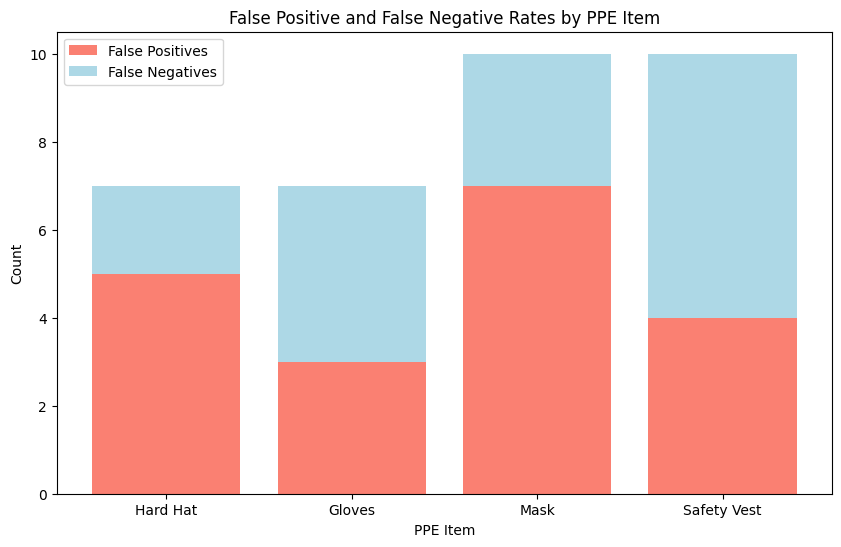

In [12]:
# Sample data
ppe_items = ['Hard Hat', 'Gloves', 'Mask', 'Safety Vest']
false_positives = [5, 3, 7, 4]  # Replace with actual values
false_negatives = [2, 4, 3, 6]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(ppe_items, false_positives, label='False Positives', color='salmon')
plt.bar(ppe_items, false_negatives, bottom=false_positives, label='False Negatives', color='lightblue')
plt.xlabel('PPE Item')
plt.ylabel('Count')
plt.title('False Positive and False Negative Rates by PPE Item')
plt.legend()
plt.show()
